# Предсказание  следующего хода

K/k — король  

Q/q — ферзь  

R/r — ладья  

B/b — слон  

N/n — конь  

P/p — пешка  

#### Расшифровка записи

7k/5p1p/p2p1Pr1/1p4pQ/8/P1P5/2pr3P/2R2K2 w - - 0 1  

w : ход белых  

— : рокировка невозможна  

— : нет возможности взятия на проходе  

0 : 0 полуходов прошло с последнего хода пешки или взятия  

1 : первый полный ход партии (начало)  

In [1]:
path_dataset_1 = 'data/fens_training_set.csv'

path_dataset_2 = 'data/fens_processed_no_turn.csv'

## 2. Датасет

In [2]:
from utils.dataset import ChessOneHotDataset, ChessDataset
import torch


dataset = ChessDataset(path_dataset_2)
for board, castling, label in dataset:
    print(board.shape)  # torch.Size([13, 8, 8])
    print(castling.shape)     # torch.Size([4])
    print(label)        # метка движения (int)
    break


dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

for board, castling, label in dataloader:
    print(board.shape)  # torch.Size([13, 8, 8])
    print(castling.shape)     # torch.Size([4])
    print(label.shape) 
    break


torch.Size([13, 8, 8])
torch.Size([4])
tensor(2517)
torch.Size([1, 13, 8, 8])
torch.Size([1, 4])
torch.Size([1])


## 3. Модель

In [ ]:

from utils.models import ChessNetMultiInput, ChessNetImproved

model = ChessNetImproved()

logits = model(board, castling)

print(logits.shape)  # [batch_size, 4096]


torch.Size([1, 4096])


In [4]:
logits

tensor([[ 0.1722, -0.0732,  0.0141,  ..., -0.1796, -0.0713, -0.0875]],
       grad_fn=<AddmmBackward0>)

## Тренировка

In [ ]:
from utils.train import train_kfold, train_model
from torch.utils.data import Dataset, DataLoader
from utils.dataset import create_data_loaders_from_csv

dataset = ChessDataset(path_dataset_2)

train_loader, val_loader = create_data_loaders_from_csv(dataset, batch_size=2048, val_split=0.3)

In [ ]:

from utils.models import ChessNetMultiInput, ChessNetImproved

model = ChessNetImproved()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


# model.load_state_dict(torch.load("save_model/best_model4.pth", map_location=torch.device(device)))  

ChessNetImproved(
  (conv1): Conv2d(13, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (resblock1): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (resblock2): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), paddin

In [13]:
# train_kfold(ChessNetMultiInput, dataset, device=torch.device('cuda'), k=5, epochs=10, batch_size=3000, save_path="save_model/cnn_model.pth", model_name="CNN_Fold")

Epoch 1/50


Train loss: 5.7766, acc: 0.0721
Val   loss: 4.6172, acc: 0.1383
Saved best model with val acc: 0.1383
------------------------------
Epoch 2/50


Train loss: 4.1783, acc: 0.1635
Val   loss: 3.6385, acc: 0.2000
Saved best model with val acc: 0.2000
------------------------------
Epoch 3/50


Train loss: 3.5413, acc: 0.2115
Val   loss: 3.2292, acc: 0.2428
Saved best model with val acc: 0.2428
------------------------------
Epoch 4/50


Train loss: 3.2179, acc: 0.2461
Val   loss: 2.9693, acc: 0.2856
Saved best model with val acc: 0.2856
------------------------------
Epoch 5/50


Train loss: 2.9798, acc: 0.2769
Val   loss: 2.8145, acc: 0.3074
Saved best model with val acc: 0.3074
------------------------------
Epoch 6/50


Train loss: 2.7847, acc: 0.3071
Val   loss: 2.6796, acc: 0.3458
Saved best model with val acc: 0.3458
------------------------------
Epoch 7/50


Train loss: 2.6146, acc: 0.3338
Val   loss: 2.5073, acc: 0.3663
Saved best model with val acc: 0.3663
------------------------------
Epoch 8/50


Train loss: 2.4501, acc: 0.3610
Val   loss: 2.4395, acc: 0.3923
Saved best model with val acc: 0.3923
------------------------------
Epoch 9/50


Train loss: 2.2936, acc: 0.3913
Val   loss: 2.2896, acc: 0.4288
Saved best model with val acc: 0.4288
------------------------------
Epoch 10/50


Train loss: 2.1447, acc: 0.4182
Val   loss: 2.1767, acc: 0.4565
Saved best model with val acc: 0.4565
------------------------------
Epoch 11/50


Train loss: 1.9916, acc: 0.4514
Val   loss: 2.1177, acc: 0.4792
Saved best model with val acc: 0.4792
------------------------------
Epoch 12/50


Train loss: 1.8462, acc: 0.4809
Val   loss: 2.0177, acc: 0.5134
Saved best model with val acc: 0.5134
------------------------------
Epoch 13/50


Train loss: 1.7070, acc: 0.5141
Val   loss: 1.9375, acc: 0.5418
Saved best model with val acc: 0.5418
------------------------------
Epoch 14/50


Train loss: 1.5735, acc: 0.5445
Val   loss: 1.9593, acc: 0.5489
Saved best model with val acc: 0.5489
------------------------------
Epoch 15/50


Train loss: 1.4407, acc: 0.5769
Val   loss: 1.8466, acc: 0.5907
Saved best model with val acc: 0.5907
------------------------------
Epoch 16/50


Train loss: 1.3245, acc: 0.6060
Val   loss: 1.8627, acc: 0.5974
Saved best model with val acc: 0.5974
------------------------------
Epoch 17/50


Train loss: 1.2116, acc: 0.6351
Val   loss: 1.7977, acc: 0.6285
Saved best model with val acc: 0.6285
------------------------------
Epoch 18/50


Train loss: 1.1068, acc: 0.6625
Val   loss: 1.7801, acc: 0.6448
Saved best model with val acc: 0.6448
------------------------------
Epoch 19/50


Train loss: 1.0145, acc: 0.6871
Val   loss: 1.7488, acc: 0.6606
Saved best model with val acc: 0.6606
------------------------------
Epoch 20/50


Train loss: 0.9337, acc: 0.7115
Val   loss: 1.7593, acc: 0.6604
------------------------------
Epoch 21/50


Train loss: 0.8597, acc: 0.7327
Val   loss: 1.7795, acc: 0.6783
Saved best model with val acc: 0.6783
------------------------------
Epoch 22/50


Train loss: 0.7931, acc: 0.7519
Val   loss: 1.7878, acc: 0.6907
Saved best model with val acc: 0.6907
------------------------------
Epoch 23/50


Train loss: 0.7426, acc: 0.7685
Val   loss: 1.7966, acc: 0.6981
Saved best model with val acc: 0.6981
------------------------------
Epoch 24/50


Train loss: 0.6953, acc: 0.7822
Val   loss: 1.8020, acc: 0.7013
Saved best model with val acc: 0.7013
------------------------------
Epoch 25/50


Train loss: 0.6556, acc: 0.7941
Val   loss: 1.8176, acc: 0.7077
Saved best model with val acc: 0.7077
------------------------------
Epoch 26/50


Train loss: 0.6256, acc: 0.8032
Val   loss: 1.9352, acc: 0.7075
------------------------------
Epoch 27/50


Train loss: 0.5917, acc: 0.8144
Val   loss: 1.8801, acc: 0.7154
Saved best model with val acc: 0.7154
------------------------------
Epoch 28/50


Train loss: 0.5642, acc: 0.8234
Val   loss: 1.8596, acc: 0.7157
Saved best model with val acc: 0.7157
------------------------------
Epoch 29/50


Train loss: 0.5434, acc: 0.8294
Val   loss: 1.8848, acc: 0.7228
Saved best model with val acc: 0.7228
------------------------------
Epoch 30/50


Train loss: 0.5193, acc: 0.8377
Val   loss: 1.8923, acc: 0.7220
------------------------------
Epoch 31/50


Train loss: 0.5025, acc: 0.8422
Val   loss: 1.9356, acc: 0.7255
Saved best model with val acc: 0.7255
------------------------------
Epoch 32/50


Train loss: 0.4943, acc: 0.8462
Val   loss: 2.0125, acc: 0.7210
------------------------------
Epoch 33/50


Train loss: 0.4832, acc: 0.8490
Val   loss: 1.9838, acc: 0.7218
------------------------------
Epoch 34/50


Train loss: 0.4717, acc: 0.8530
Val   loss: 1.9478, acc: 0.7288
Saved best model with val acc: 0.7288
------------------------------
Epoch 35/50


Train loss: 0.4526, acc: 0.8592
Val   loss: 1.9756, acc: 0.7291
Saved best model with val acc: 0.7291
------------------------------
Epoch 36/50


Train loss: 0.4485, acc: 0.8609
Val   loss: 2.0061, acc: 0.7259
------------------------------
Epoch 37/50


Train loss: 0.4460, acc: 0.8609
Val   loss: 2.0702, acc: 0.7304
Saved best model with val acc: 0.7304
------------------------------
Epoch 38/50


Train loss: 0.4406, acc: 0.8629
Val   loss: 2.0263, acc: 0.7306
Saved best model with val acc: 0.7306
------------------------------
Epoch 39/50


Train loss: 0.4259, acc: 0.8664
Val   loss: 2.0013, acc: 0.7284
------------------------------
Epoch 40/50


Train loss: 0.4218, acc: 0.8687
Val   loss: 2.0669, acc: 0.7289
------------------------------
Epoch 41/50


Train loss: 0.4147, acc: 0.8703
Val   loss: 2.0710, acc: 0.7324
Saved best model with val acc: 0.7324
------------------------------
Epoch 42/50


Train loss: 0.4135, acc: 0.8719
Val   loss: 2.1766, acc: 0.7305
------------------------------
Epoch 43/50


Train loss: 0.4078, acc: 0.8726
Val   loss: 2.1081, acc: 0.7313
------------------------------
Epoch 44/50


Train loss: 0.4005, acc: 0.8760
Val   loss: 2.0567, acc: 0.7353
Saved best model with val acc: 0.7353
------------------------------
Epoch 45/50


Train loss: 0.3974, acc: 0.8762
Val   loss: 2.1141, acc: 0.7353
------------------------------
Epoch 46/50


Train loss: 0.3921, acc: 0.8787
Val   loss: 2.0687, acc: 0.7321
------------------------------
Epoch 47/50


Train loss: 0.3962, acc: 0.8762
Val   loss: 2.0864, acc: 0.7304
------------------------------
Epoch 48/50


Train loss: 0.3939, acc: 0.8769
Val   loss: 2.0706, acc: 0.7328
------------------------------
Epoch 49/50


Train loss: 0.3872, acc: 0.8797
Val   loss: 2.0840, acc: 0.7327
------------------------------
Epoch 50/50


Train loss: 0.3797, acc: 0.8810
Val   loss: 2.0782, acc: 0.7364
Saved best model with val acc: 0.7364
------------------------------


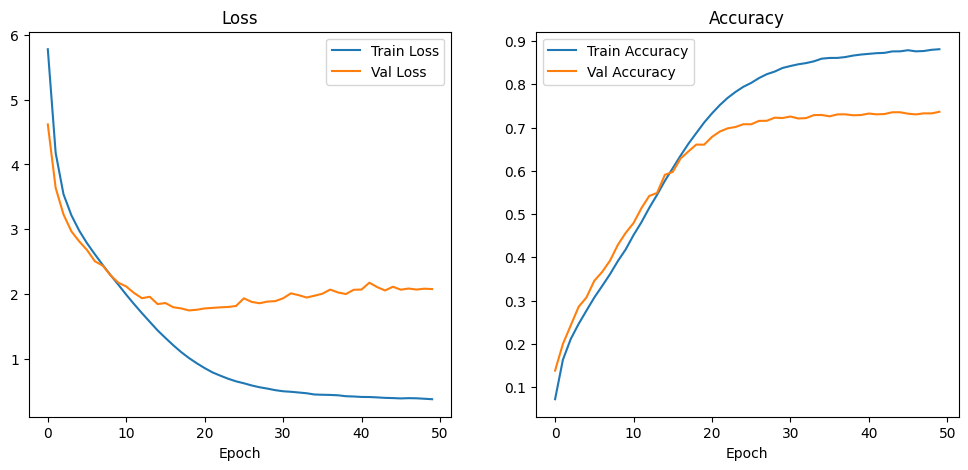

In [14]:

train_model(model, train_loader, val_loader, device=device, epochs=50, lr=1e-3, save_path="save_model/cnn_model.pth", model_name="CNN")